# Ejemplo PCA - Clasificación de vinos

Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero procedentes de tres cultivos diferentes. El análisis determinó las cantidades de 13 componentes presentes en cada uno de los tres tipos de vino.

Fuente de datos: Aeberhard,Stefan y Forina,M. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J. (https://archive.ics.uci.edu/dataset/109/wine)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv("/content/Wine.csv")
df['class'] = df['class'].astype('category')

## Análisis exploratorio

In [21]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   class                         178 non-null    category
 1   Alcohol                       178 non-null    float64 
 2   Malic acid                    178 non-null    float64 
 3   Ash                           178 non-null    float64 
 4   Alcalinity of ash             178 non-null    float64 
 5   Magnesium                     178 non-null    int64   
 6   Total phenols                 178 non-null    float64 
 7   Flavanoids                    178 non-null    float64 
 8   Nonflavanoid phenols          178 non-null    float64 
 9   Proanthocyanins               178 non-null    float64 
 10  Color intensity               178 non-null    float64 
 11  Hue                           178 non-null    float64 
 12  OD280/OD315 of diluted wines  178 non-null    floa

In [23]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Vemos la matriz de correlación

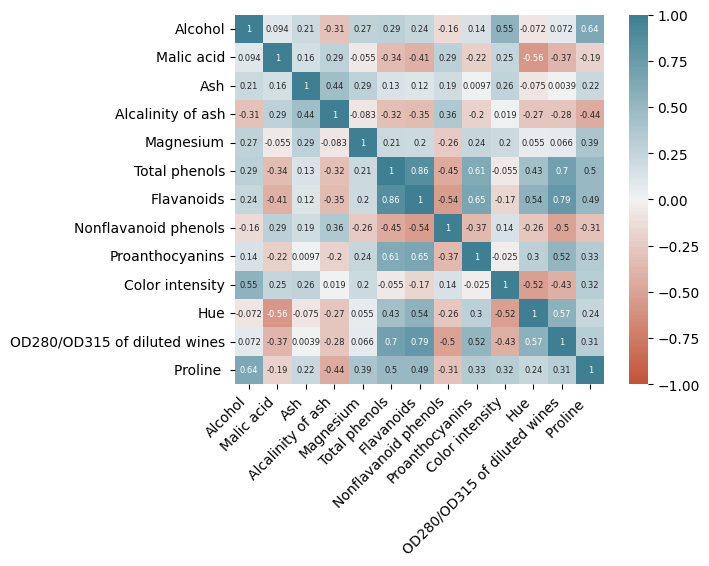

In [24]:
corr = df.drop(['class'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

## PCA

### Estandarización

Se realiza para evitar problemas con variables con distinta naturaleza y variabilidad. Podemos elegir hacerlo como no, pero las variables con mayores valores de varianza le quitarán peso al resto de las variables, por lo tanto en este caso vamos a realizar la estandarización.

In [25]:
df_sub = df.drop(['class'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

### Aplicación de la técnica

In [26]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0)

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
pca_df['class'] = df['class']

En la siguiente tabla vemos la proyección de cada registro en cada una de las nuevas variables.

In [27]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,class
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052,1
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626,1
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655,1
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444,1
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.361043,-2.210055,-0.341606,1.055549,-0.572549,-1.105669,0.955720,-0.145687,-0.022434,-0.303262,0.138836,0.170305,-0.114105,3
174,-2.594637,-1.752286,0.206997,0.348513,0.254346,-0.026391,0.146480,-0.550873,-0.097694,-0.205481,0.257471,-0.278645,-0.186844,3
175,-2.670307,-2.753133,-0.938295,0.311157,1.267779,0.272300,0.677325,0.046892,0.001219,-0.247300,0.511050,0.696801,0.071875,3
176,-2.380303,-2.290884,-0.549147,-0.686348,0.811666,1.175467,0.632192,0.389729,0.057286,0.490107,0.298979,0.338865,-0.021804,3


### Eigenvectors

Son los valores que conforman los coeficientes de cada una de las nuevas variables.

In [28]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
X2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
X3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
X4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
X5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
X6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
X7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
X8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
X9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
X10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


### Selección del número de componentes principales

In [29]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [30]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,4.705850,0.361988,0.361988
1,2.496974,0.192075,0.554063
2,1.446072,0.111236,0.665300
3,0.918974,0.070690,0.735990
4,0.853228,0.065633,0.801623
5,0.641657,0.049358,0.850981
6,0.551028,0.042387,0.893368
7,0.348497,0.026807,0.920175
8,0.288880,0.022222,0.942397
9,0.250902,0.019300,0.961697


Vemos gráficamente la varianza acumulada:

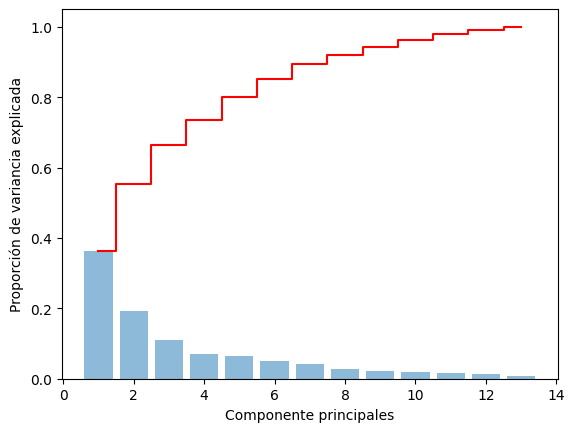

In [31]:
plt.bar(range(1,14), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las tres primeras componentes acumulan el 67% de la variabilidad total, es decir, **no** están cercanas a cumplir con el primer criterio (>~75%). Sin embargo, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser).

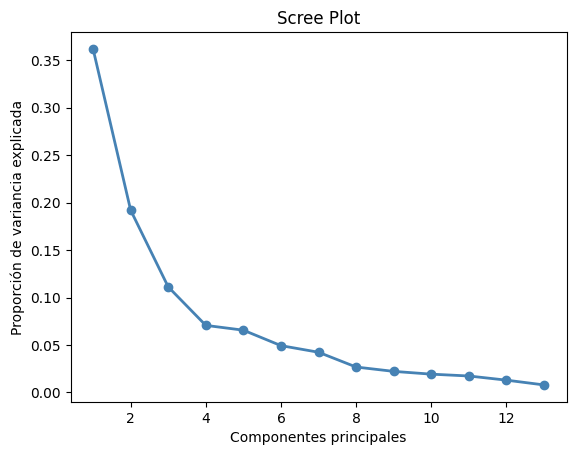

In [32]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Al observar el gráfico del codo, vemos que el quiebre parece producirse entre la segunda y cuarta componente. Considerando la primera y la segunda componentes llegaríamos a un 55% de la variabilidad total, por lo que consideramos óptimo tomar hasta la tercera componente.

### Matriz de correlación de PC seleccionados

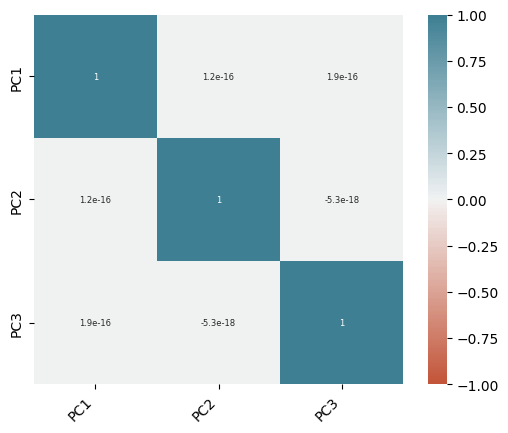

In [33]:
corr = pca_df[['PC1', 'PC2', 'PC3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Scatter plots

In [34]:
features = df.drop(columns=['class']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["class"],  labels={'color': 'class'})
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature,
    )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["class"],  labels={'color': 'class'})
fig.show()

##¿Nos agrega valor analizar nuestros datos con isomap, t-sne y umap?

### Isomap

In [35]:
from sklearn.manifold import Isomap

In [36]:
isomap_df = Isomap(n_neighbors=6, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['class'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

### T-sne

In [37]:
from sklearn.manifold import TSNE

In [38]:
tsne = TSNE(n_components=3, random_state=0, perplexity=5)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter_3d(
    projections_tsne, x=0, y=1, z=2,
    color=df['class'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

### UMAP

In [39]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=89712fb143e7a44e0d881a21a5cd0b7ced60209cda15d3dc77a58210d77ad013
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=6e8356218d81a8de8c1c36f1670b9b088542964830ac0b040342746772a3db2a
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [40]:
import umap

In [41]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df_std)
proj_3d = umap_3d.fit_transform(df_std)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['class'], labels={'color': 'class'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['class'], labels={'color': 'class'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()